# 1. Linear Regression

Linear regression comes with a set of implicit assumptions:

* Linear regression works best when the **data is linear**
* Linear regression is **sensitive to outliers**

### Gradient Descent

Given a **prediction**

$$
\hat{y} = w_1 x + w_0
$$

and a **loss function** MAE or MSE.

The **mean absolute error** (MAE) is calculated as:

$$
\text{Error} = \text{E}(w_1, w_0) = \frac{1}{m} \sum_{i=1}^m |y_i - \hat{y}_i|
$$

The **mean squared error** (MSE) is calculated as:

$$
\text{Error} = \text{E}(w_1, w_0) = \frac{1}{2m} \sum_{i=1}^m (y_i - \hat{y}_i)^2
$$

The **residual sum of squares** (RSS) is calculated as:

$$
\text{Error} = \text{E}(w_1, w_0) = \sum_{i=1}^m (y_i - \hat{y}_i)^2
$$

with $m$ being the number of observations.

Then the **gradient descent step** calculates as

$$
w_i \to w_i + \alpha \cdot \frac{\partial}{\partial w_i} \text{Error}
$$

For MSE as **loss function** this is:

$$
\begin{aligned}
\frac{\partial}{\partial w_1} \text{Error} &= \frac{\partial \, \text{Error}}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial w_1} =  - \, \frac{1}{m} \sum_{i=1}^{m} (y - \hat{y}) \cdot x \\
\frac{\partial}{\partial w_0} \text{Error} &= \frac{\partial \, \text{Error}}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial w_0} =  - \, \frac{1}{m} \sum_{i=1}^{m} (y - \hat{y})
\end{aligned}
$$

### Types of Gradient Descent

**Stochastic Gradient Descent**: calculate loss and update weights for one point ($m = 1$), then do the same for the next point.

**Mini-batch Gradient Descent** split data into many small batches ($m > 1$). For each batch, calculate the sum of the losses and update the weights.

**Batch Gradient Descent**: calculate losses for all points ($m = M$), add them and update the weights.

### Implementation of Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('data/linear-regression-data.csv', delimiter = ',')
X = data[:, :-1]
y = data[:, -1]

print(f'X is a matrix with shape {X.shape}. This allows to have multiple features')
print(f'y is a vector with shape {y.shape}')

X is a matrix with shape (100, 1). This allows to have multiple features
y is a vector with shape (100,)


In [3]:
def plot(X, y, regression_coef, title):
    X_min = X.min()
    X_max = X.max()
    counter = len(regression_coef)
    for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
    plt.title(title)
    plt.scatter(X, y, zorder = 3);

In [4]:
np.random.seed(42)
learn_rate = 0.005
num_iter = 25

def stochasticGradientDescent(X, y):
    W = np.zeros(X.shape[1])
    b = 0
    regression_coef = [np.hstack((W,b))]

    for _ in range(num_iter):
        W_ = 0
        b_ = 0
        for i in range(X.shape[0]):
            y_pred = X[i] * W + b
            error = y[i] - y_pred
            W_ += error * X[i] * learn_rate
            b_ += error * learn_rate
        W = W + W_
        b = b + b_
        regression_coef.append(np.hstack((W, b)))
    
    return regression_coef

def miniBatchGradientDescent(X, y, batch_size=20):
    W = np.zeros(X.shape[1])
    b = 0
    regression_coef = [np.hstack((W,b))]

    for _ in range(num_iter):
        batch = np.random.choice(range(X.shape[0]), batch_size)    # create a random mini-batch
        X_batch = X[batch,:]
        y_batch = y[batch]
        y_pred = np.matmul(X_batch, W) + b
        error = y_batch - y_pred
        W = W + learn_rate * np.matmul(error, X_batch)
        b = b + learn_rate * np.sum(error)
        regression_coef.append(np.hstack((W, b)))
    
    return regression_coef

def batchGradientDescent(X, y):
    W = np.zeros(X.shape[1])
    b = 0
    regression_coef = [np.hstack((W,b))]

    for _ in range(num_iter):
        y_pred = np.matmul(X, W) + b
        error = y - y_pred
        W = W + learn_rate * np.matmul(error, X)
        b = b + learn_rate * np.sum(error)
        regression_coef.append(np.hstack((W, b)))
    
    return regression_coef

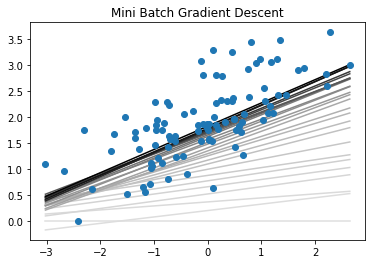

In [5]:
regression_coef = miniBatchGradientDescent(X, y, batch_size=20)
plot(X, y, regression_coef, 'Mini Batch Gradient Descent')

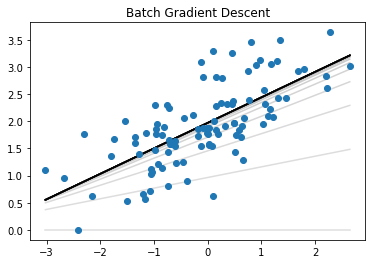

In [6]:
regression_coef = batchGradientDescent(X, y)
plot(X, y, regression_coef, 'Batch Gradient Descent')

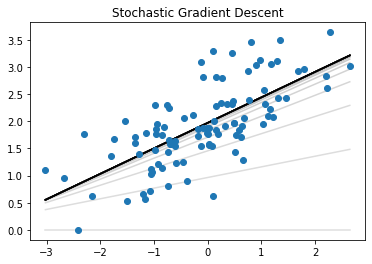

In [7]:
regression_coef = stochasticGradientDescent(X, y)
plot(X, y, regression_coef, 'Stochastic Gradient Descent')

## Linear Regression with SciKit-Learn

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression

bmi_life_data = pd.read_csv('data/bmi_and_life_expectancy.csv', header=0)
bmi_life_data

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083
...,...,...,...
158,Vanuatu,63.4,26.78926
159,West Bank and Gaza,74.1,26.57750
160,Vietnam,74.1,20.91630
161,Zambia,51.1,20.68321


In [9]:
model = LinearRegression()
model.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])

laos_life_exp = model.predict([[21.07931]])
laos_life_exp

/Users/duerr/miniconda3/envs/udacity/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[60.31564716]])

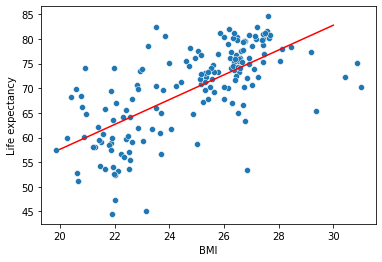

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=bmi_life_data, x='BMI', y='Life expectancy');
x = np.array([20,30])
y = lambda x: model.coef_ * x + model.intercept_
plt.plot(x, y(x)[0], color='r');

## Multiple Linear Regression

A **predictor** is an **independent variable** you're looking at in order to make predictions about other **outcome** variables (BMI in the last example), while the values you are trying to predict are known as **dependent variables** (life expectancy in the last example)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Load the data from the boston house-prices dataset 
import warnings
warnings.filterwarnings('ignore')
boston_data = load_boston()
x = boston_data['data']
y = boston_data['target']

# Make and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Make a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]
prediction = model.predict(sample_house)
prediction

array([23.68284712])

## Closed Form Solution

#### One Feature

For linear regression with **one predictor** ($n = 1$), the weights $w_1$ and $w_2$ can also be determined mathematically by solving the equations

$$
\begin{aligned}
\frac{\partial}{\partial w_1} \text{E}(w_1, w_2) &= 0 \\
\frac{\partial}{\partial w_2} \text{E}(w_1, w_2) &= 0
\end{aligned}
$$

#### Multiple Features

For linear regression with **multiple features** ($n > 1$), we introduce the following notation.

The **matrix** $X$ contains the data where each **row** is one datapoint with $n$ features, and $x_0^{(i)} =1$ represents the **bias**:
 
$$
X = \begin{pmatrix}x_0^{(0)} & x_1^{(0)} & \cdots & x_n^{(0)} \\ x_0^{(1)} & x_1^{(1)} & \cdots & x_n^{(1)} \\ \vdots & \vdots & \ddots & \vdots \\ x_0^{(m)} & x_1^{(m)} & \cdots & x_n^{(m)} \end{pmatrix} = \begin{pmatrix}1 & x_1^{(0)} & \cdots & x_n^{(0)} \\ 1 & x_1^{(1)} & \cdots & x_n^{(1)} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_1^{(m)} & \cdots & x_n^{(m)} \end{pmatrix}
$$

The **labels** are a **vector**

$$
y = 
\begin{pmatrix}
 y^{(1)} \\
 y^{(2)} \\
 \vdots \\
 y^{(m)} \\
\end{pmatrix}
$$

and the **weights** are a **matrix**

$$
W =
\begin{pmatrix}
 W_1 \\
 W_2 \\
 \vdots \\
 W_n \\
\end{pmatrix}
$$

Then the equation for the **mean square error** is the matrix product

$$
E(W) = \frac{1}{m} ((XW)^T - y^T) (XW - y)
$$

Since we need to minimize it, we can forget about the factor of $\frac{1}{m}$, so we get

$$
E(W) = W^TX^TXW - (XW)^Ty - y^T(XW) + y^Ty
$$

In the sum above, the second and the third terms are the same, since it's the inner product of two vectors, which means it's the sum of the products of its coordinates. 

Therefore,

$$
E(W) = W^TX^TXW - 2(XW)^Ty + y^Ty
$$

To minimize this, we need to take the derivative with respect to all values in the matrix WW. Using the chain rule, as we used above, we get the following:

$$
\frac{\partial{E}}{\partial{W}} = 2X^TXW - 2X^Ty
$$

And in order to set this equal to zero, we need

$$
X^TXW - X^Ty = 0
$$

or equivalently,

$$
W = (X^TX)^{-1} X^T y
$$

In [12]:
# Example:

import numpy as np

x1 = np.array([3, 2])
x2 = np.array([5, 3])
x3 = np.array([6, 3])

X = np.array([ [1, x1[0]],
               [1, x2[0]],
               [1, x3[0]] ])

y = np.array([x1[1], x2[1], x3[1]])

W = np.linalg.inv(X.T @ X) @ X.T @ y
print(W)

[1.         0.35714286]


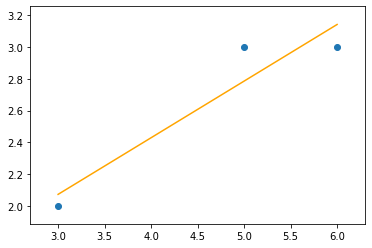

In [13]:
plt.scatter([x1[0], x2[0], x3[0]], [x1[1], x2[1], x3[1]])

p1 = np.min(X[:,1])
p2 = np.max(X[:,1])
plt.plot([p1, p2], [W[1] * p1 + W[0], W[1] * p2 + W[0]], c='orange')
plt.margins(0.1, 0.1)

# Polynomial Regression

Polynomial features are **non-linear features**, created by raising existing features to an exponent. A prediction could **for example** be

$$
\hat{y} = w_3 x^3 + w_2 x^2 + w_1 x + w_0
$$

Scikit Learn provides a `PolynomialFeatures` class, which **transforms** the given features into **polynomial features** for a given **degree**.

Given this new transformed data, a **linear-regression** is applied to the polynomial data.

In [14]:
from sklearn.preprocessing import PolynomialFeatures

# Example:
#
#   1 feature 'a' with five observations
#   degree: 3
#
a = np.array([1, 2, 3, 4, 5])[:, None]

poly = PolynomialFeatures(degree=3)
a_poly = poly.fit_transform(a)

# the polynominal features are: 1, a, a^2, a^3
print(a_poly)

[[  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]]


In [15]:
# Example:
#
#   2 features 'a' and 'b' with five observations each
#   degree: 3
#
a = np.array([[1, 6],
              [2, 7],
              [3, 8],
              [4, 9],
              [5, 10]])

poly = PolynomialFeatures(degree=3)
a_poly = poly.fit_transform(a)

# the polynominal features are: 1, a, b, a^2, ab, b^2, a^3, a^2b, ab^2, b^3
print(a_poly)

[[   1.    1.    6.    1.    6.   36.    1.    6.   36.  216.]
 [   1.    2.    7.    4.   14.   49.    8.   28.   98.  343.]
 [   1.    3.    8.    9.   24.   64.   27.   72.  192.  512.]
 [   1.    4.    9.   16.   36.   81.   64.  144.  324.  729.]
 [   1.    5.   10.   25.   50.  100.  125.  250.  500. 1000.]]


### Example

We use a dataset with **one feature**, hence predict a polynom of degree $d$:

$$
\hat{y} = \sum_{i=0}^{d} w_i x^i
$$

In [16]:
data = np.loadtxt('data/polynomial-regression-data.csv', delimiter = ',', skiprows=True)
X = data[:, :-1]
y = data[:, -1]

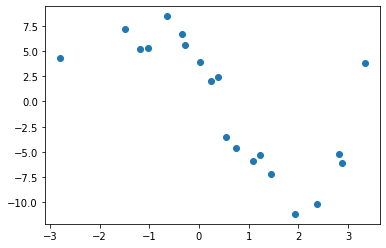

In [17]:
plt.scatter(X, y);

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_feat = PolynomialFeatures(degree=4)    # try different degrees manually: 4 gives the best fit for the given data
X_poly = poly_feat.fit_transform(X)

poly_model = LinearRegression(fit_intercept=False)
poly_model.fit(X_poly, y)

LinearRegression(fit_intercept=False)

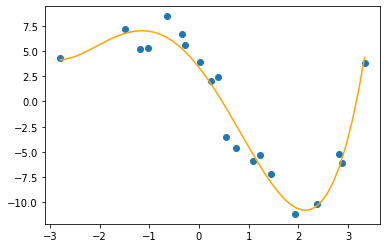

In [19]:
c = poly_model.coef_
b =  poly_model.intercept_

from functools import reduce
f = lambda x: reduce(lambda a, v: a + v[1] * pow(x, v[0]), [(exp, w) for exp, w in enumerate(c)], b)

x = np.linspace(X.min(), X.max())
plt.plot(x, f(x), c='orange')
plt.scatter(X, y);

# Regularization

Regularization as a technique to **assure** that your models will not only fit (or even over-fit) to the data available, but also **generalize** to new situations.

Regularization will **remove features** from a model, by setting their coefficients to zero, if the penalty for removing them is small.

It is easy to see, that the more complex a polynomial prediction in terms of coefficients $w$ is, the more likely it is that it will overfit. Hence the added regularization term will increase the error.

On the other hand a simple nearly linear prediction has less coefficients $w$ which so decreases the error, hence avoids over-fitting.

### L1-Regularization

L1-Regularization of linear regression (**Lasso Regression**) consists of a **linear model** with an **added regularization term**. The objective function to minimize is then:

$$
\text{Error} = \text{MSE} + \alpha \sum_{i=1}^m |w_i|
$$

with an $\alpha$ that can take various values:

* $\alpha = 0$: same coefficients as least squares linear regression
* $0 < \alpha < \infty$: 
* $\alpha = \infty$: all coefficients are zero

In the gradient descent step, L1 regularization does additionally decrease $\alpha$ from non-zero weights.

### L2-Regularization

L2-Regularization of linear regression (**Ridge Regression**) consists of a **linear model** with an **added regularization term**:

$$
\text{Error} = \text{MSE} + \alpha \sum_{i=1}^m w_i^2 
$$

In the gradient descent step, L2 regularization does additionally decrease $\alpha w_i$ from non-zero weights $w_i$.


### Example

Data contains six **predictor** variables and one **outcome** variable.

In [48]:
train_data = np.loadtxt('data/regularization-data.csv', delimiter = ',')
X = train_data[:, :-1]  # all columns except the last
y = train_data[:, -1]

In [64]:
boston_data = load_boston()
X = boston_data['data']
y = boston_data['target']


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [61]:
lin_reg.coef_

array([-1.02329555e-01,  4.42050684e-02,  1.32071912e-02,  2.69156613e+00,
       -2.12528557e+01,  3.21709057e+00,  1.68626873e-02, -1.55057309e+00,
        3.58958140e-01, -1.32885077e-02, -1.06384616e+00,  9.73249759e-03,
       -5.78627702e-01])

In [62]:
lin_reg.score(X_train, y_train)

0.7304313699187688

In [63]:
lin_reg.score(X_test, y_test)

0.7675984720652902

In [54]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=1)

In [55]:
lasso_reg.coef_

array([ 0.        ,  2.37791681,  2.03715373, -0.05956482, -3.95438316,
        0.        ])

In [56]:
lasso_reg.score(X_train, y_train)

0.9892312113347429

In [57]:
lasso_reg.score(X_test, y_test)

0.9795809784103109

# Feature Scaling

There are two common scalings:

1. **Standardizing**
2. **Normalizing**

Having scaled data is crucial for predictions with **distance-based metrics**, e.g. Support Vector Machines (**SVM**) or k-nearest neighbors (**KNN**), and when applying **regularization**, otherwise applying regularization will unfairly punish the feature with the small range.

Standardization is important, because if a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

### Standardizing

Standardizing means subtracting the mean of the column, and then dividing by the standard deviation: 

$$
x_s = \frac{x - \overline{x}}{\sigma}
$$

### Normalizing

Normalizing means scaling data between `0` and `1`:

$$
x_n = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

In [24]:
df = pd.DataFrame({'height': [1, 2, 3, 4, 5, 6]})

# Standardizing:
df['height_standard'] = (df['height'] - df['height'].mean()) / df['height'].std()

# Normalizing:
df['height_normal'] = (df['height'] - df['height'].min()) / (df['height'].max() - df['height'].min())

df

,height,height_standard,height_normal
0,1,-1.336306,0.0
1,2,-0.801784,0.2
2,3,-0.267261,0.4
3,4,0.267261,0.6
4,5,0.801784,0.8
5,6,1.336306,1.0


### Regularization with Scaled Data

In [25]:
train_data = np.loadtxt('data/regularization-data.csv', delimiter = ',')
X = train_data[:, :-1]  # all columns except the last
y = train_data[:, -1]

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_scaled, y)

Lasso(alpha=1)

In [28]:
reg_coef = lasso_reg.coef_
reg_coef

array([  0.        ,   3.90753617,   9.02575748,  -0.        ,
       -11.78303187,   0.45340137])